## Initial Dataset Exploration

In [2]:
## import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the Dataset

In [73]:
## read data using pandas
pump_data = pd.read_csv('hypothetical_pump_failure_dataset.csv')
pump_data.head()

,timestamp,vibration_level,temperature_C,pressure_PSI,flow_rate_m3h,failure
0,2024-01-01 00:00:00,0.549671,76.996777,93.248217,40.460962,0
1,2024-01-01 01:00:00,0.486174,74.623168,98.554813,45.698075,0
2,2024-01-01 02:00:00,0.564769,70.298152,92.075801,47.931972,0
3,2024-01-01 03:00:00,0.652303,66.765316,96.920385,59.438438,0
4,2024-01-01 04:00:00,0.476585,73.491117,81.063853,52.782766,0


#### Dataset Exploration

In [74]:
## get the overall information of the data
pump_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        1000 non-null   object 
 1   vibration_level  1000 non-null   float64
 2   temperature_C    1000 non-null   float64
 3   pressure_PSI     1000 non-null   float64
 4   flow_rate_m3h    1000 non-null   float64
 5   failure          1000 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 47.0+ KB


#### Statistical Summary

In [75]:
## doing the statistical summary analysis to get the count, mean, min, max and standard deviations of the data
pump_data.describe()

,vibration_level,temperature_C,pressure_PSI,flow_rate_m3h,failure
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.501933,70.354181,100.058342,49.906404,0.049000
std,0.097922,4.987272,9.834543,5.135663,0.215976
min,0.175873,55.298057,69.804878,35.352757,0.000000
25%,0.435241,66.968792,93.520004,46.312898,0.000000
50%,0.502530,70.315386,99.997492,50.000923,0.000000
75%,0.564794,73.644411,106.609153,53.334727,0.000000
max,0.885273,85.965538,139.262377,66.215465,1.000000


#### Missing Values Check

In [76]:
## checking the missing values
print(pump_data.isnull().sum())

timestamp          0
vibration_level    0
temperature_C      0
pressure_PSI       0
flow_rate_m3h      0
failure            0
dtype: int64


#### Feature Understanding

In [78]:
df_features = pump_data.drop(columns = ['failure'])
df_target = pump_data['failure']

In [79]:
## features
df_features.head()

,timestamp,vibration_level,temperature_C,pressure_PSI,flow_rate_m3h
0,2024-01-01 00:00:00,0.549671,76.996777,93.248217,40.460962
1,2024-01-01 01:00:00,0.486174,74.623168,98.554813,45.698075
2,2024-01-01 02:00:00,0.564769,70.298152,92.075801,47.931972
3,2024-01-01 03:00:00,0.652303,66.765316,96.920385,59.438438
4,2024-01-01 04:00:00,0.476585,73.491117,81.063853,52.782766


In [80]:
## target
df_target.head()

0    0
1    0
2    0
3    0
4    0
Name: failure, dtype: int64

#### Failure/Non Failure Imbalance

In [81]:
## as the target values are 1 and 0
## which means 1 = failure
## 0 = success or not failure.

print(pump_data['failure'].value_counts())

failure
0    951
1     49
Name: count, dtype: int64


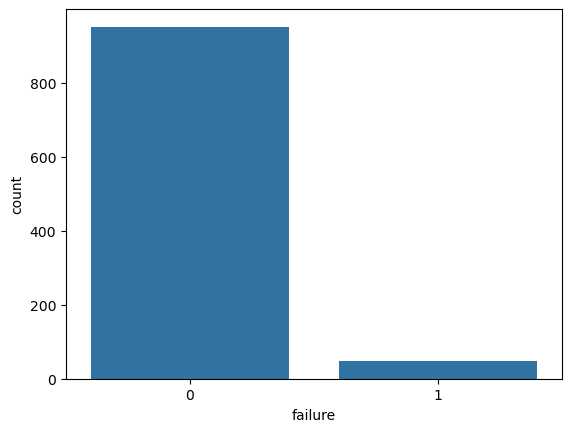

In [82]:
sns.countplot(x='failure', data=pump_data)
plt.show()

## Data Exploration

**By Looking at the Data**

+ The dataset contain columns which are `timestamp`, `vibration_level`, `temperature_C`, `pressure_PSI`, `flow_rate_m3h`, `failure`.
+ Number of Rows are 1000.
+ By the first Look it is understood that there is no missing values in the data.
+ And from the timestamp, it is understood that the data is hourly readings of a particular pump starting from `1st January 2024 12:00 AM` to `11th February 2024 3:00 PM`.
+ So this is a data of a pump perfomance of 1000 hours.

**Statistical Summary**

Vibration Level
+ Average (0.501933): The average vibration level is around 0.50, with a fairly low standard deviation (0.097922), indicating that the vibration levels are generally stable.
+ Range (0.175873 to 0.885273): The minimum and maximum values suggest that the vibration level varies but within a moderate range. This range might indicate normal operating conditions, but it’s essential to explore whether higher vibration levels correlate with failures.
+ Implication: If high vibration levels are linked to failures, the maximum value (0.885273) could be a threshold to monitor. However, this needs to be validated with failure events in your dataset.

Temperature
+ Average (70.354181): The average temperature is around 70°C, with a larger standard deviation (4.987272) compared to vibration, indicating more variability in temperature readings.
+ Range (55.298057 to 85.965538): The temperature values span a wide range, from 55°C to nearly 86°C. The higher end might indicate overheating, which could be a precursor to failure.
+ Implication: If there are failures at higher temperatures, the upper range (85.965538) could be critical. Plotting temperature against time and correlating it with failures could provide insights into whether high temperatures are a strong predictor of failure.

Pressure
+ Average (100.058342): The average pressure is around 100 PSI, with a standard deviation of 9.834543, indicating that pressure fluctuates more significantly than vibration or temperature.
+ Range (69.804878 to 139.262377): The pressure varies widely, with some readings as low as 69 PSI and others as high as 139 PSI. This suggests that the pump operates under varying conditions, which could stress the system.
+ Implication: Extreme pressure readings (both low and high) might be linked to potential failures. Analyzing pressure patterns before failures could help in identifying critical thresholds.

Flow Rate
+ Average (49.906404): The flow rate hovers around 50 m³/h, with a relatively moderate standard deviation, indicating consistent flow performance.
+ Range (35.352757 to 66.215465): The flow rate also shows some variability, with lower values potentially indicating blockages or issues with the pump's efficiency.
+ Implication: Similar to the other features, analyzing flow rate in relation to failures can help in identifying if low or high flow rates are indicators of pump malfunction.

General Observations
+ Feature Variability: Pressure and temperature show more variability compared to vibration and flow rate. This suggests that these might be more influential in predicting failures.
+ Potential Outliers: The minimum and maximum values in each feature may represent outliers or edge cases. Investigating these instances could reveal critical conditions leading to failure.
+ Sensor Interaction: It might be beneficial to explore interactions between features (e.g., high pressure combined with high temperature) to see if they jointly contribute to failures.

**Checking the Missing Values**

+ There is no Missing Values in the Dataset

**Feature Understanding**

+ As the column failure represents the target which is failure or not failure based on the readings of the others.
+ The features are vibration level, temperature, pressure, flow rate of the pump.
+ And the column failure is the target

**Failure/Non Failure Imbalance in the Data**

+ From the whole data, out of 1000 readings only 49 times the pump failed.